In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [32]:
pc_run_name = 'xc_nopop2'
dc_run_name = 'xc_xray_noLX_nopop2'

In [35]:
pc_run_name = 'xc'
dc_run_name = 'xc_xray_noLX'

In [36]:
r_pc = np.load(f"../outputs/dm21cm/{pc_run_name}_records.npy", allow_pickle=True).item()
r_dc = np.load(f"../outputs/dm21cm/{dc_run_name}_records.npy", allow_pickle=True).item()

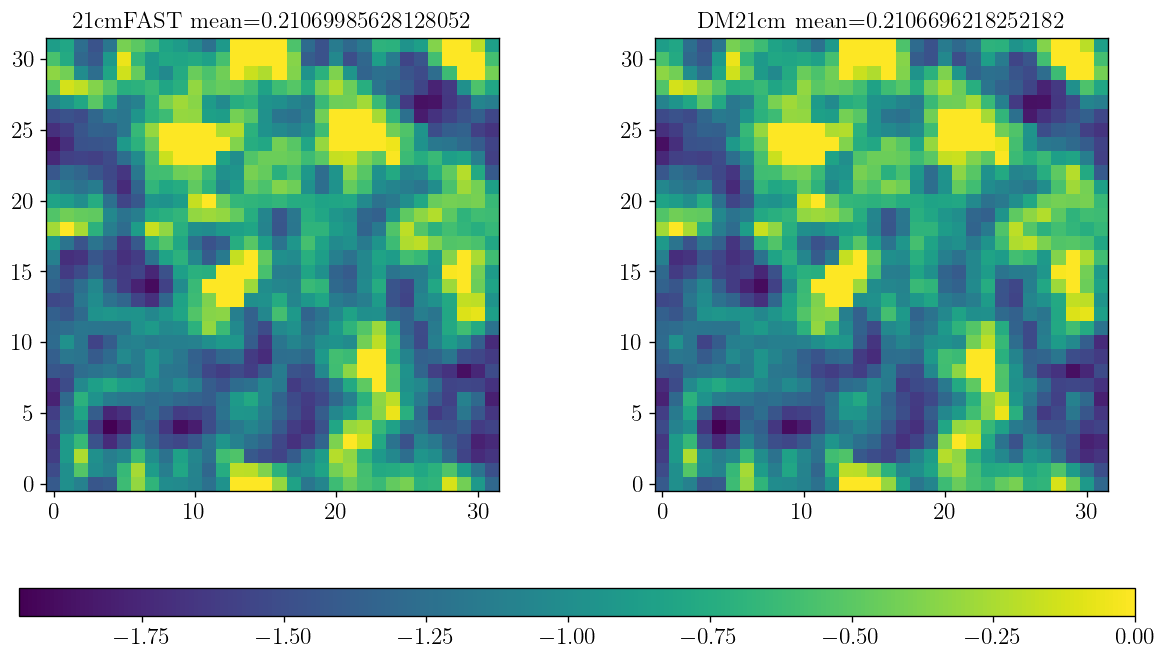

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

i = 150
z1 = 1-r_pc['x_H_slice'][i]
z2 = 1-r_dc['x_H_slice'][i]
z1 = np.log10(z1)
z2 = np.log10(z2)
vmin = np.min([np.min(z1), np.min(z2)])
vmax = np.max([np.max(z1), np.max(z2)])

ax = axs[0]
im = ax.imshow(z1, origin='lower', vmin=vmin, vmax=vmax)
ax.set_title(f"21cmFAST mean={np.mean(1-r_pc['x_H_slice'][i])}")

ax = axs[1]
ax.imshow(z2, origin='lower', vmin=vmin, vmax=vmax)
ax.set_title(f"DM21cm mean={np.mean(1-r_dc['x_H_slice'][i])}")

fig.colorbar(im, ax=axs, orientation='horizontal', aspect=40)

Text(0.5, 1.0, 'DM21cm')

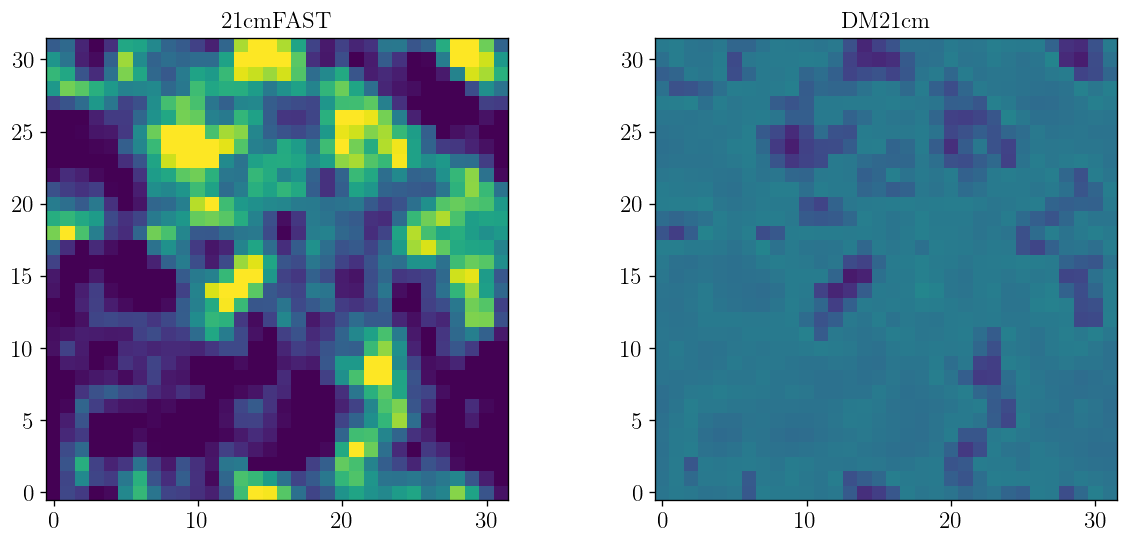

In [5]:
i = 180

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax = axs[0]
ax.imshow(np.log10(r_pc['x_e_slice'][i]), origin='lower', vmin=np.log10(r_pc['x_e'][i]*0.9), vmax=np.log10(r_pc['x_e'][i]*1.2))
ax.set_title('21cmFAST')

ax = axs[1]
ax.imshow(np.log10(r_dc['x_e_slice'][i]), origin='lower', vmin=np.log10(r_dc['x_e'][i]*0.9), vmax=np.log10(r_dc['x_e'][i]*1.2))
ax.set_title('DM21cm')

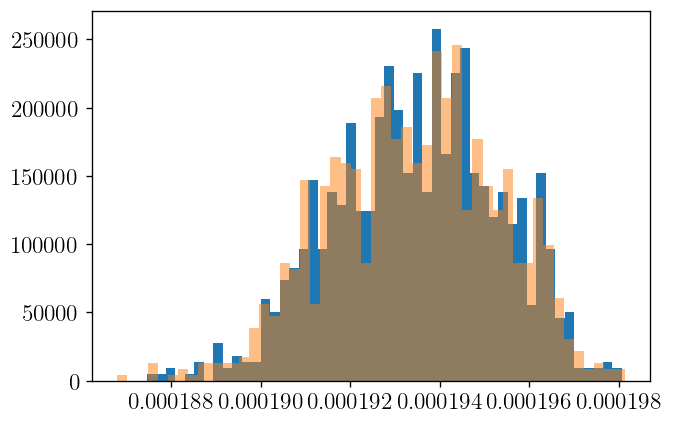

In [6]:
plt.hist((1-r_pc['x_H_slice'][100]).flatten(), bins=50, density=True)
plt.hist((1-r_dc['x_H_slice'][100]).flatten(), bins=50, alpha=0.5, density=True);

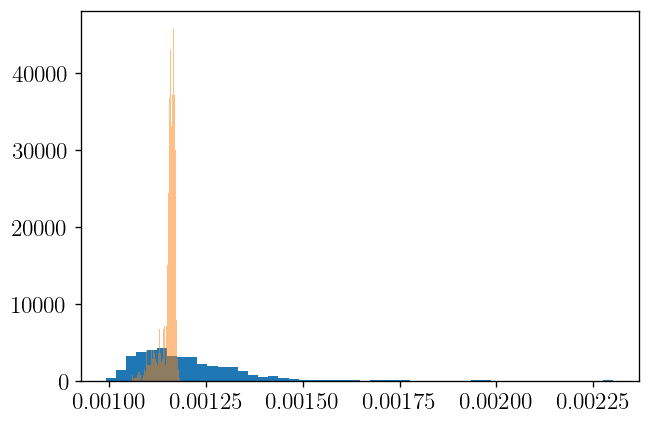

In [7]:
plt.hist((r_pc['x_e_slice'][180]).flatten(), bins=50, density=True)
plt.hist((r_dc['x_e_slice'][180]).flatten(), bins=50, alpha=0.5, density=True);

In [8]:
print(np.mean(r_dc['x_e_slice'][150]), r_dc['x_e'][150])
print(np.mean(r_pc['x_e_slice'][150]), r_pc['x_e'][150])

0.00031411526 0.00031383397
0.00032283572 0.00032448
